In [1]:
from datetime import datetime as dt


# Synthetic dataset
from sklearn.datasets import make_classification# Data processing
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

import pandas as pd
import numpy as np
from collections import Counter

import plotly.graph_objects as go

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model and performance
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from keras.utils.vis_utils import plot_model

import scipy.cluster.hierarchy as sch

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
dataset1 = pd.read_csv('C:/Users/aggelosuser/Desktop/test9after.csv', parse_dates=True)#, index_col="time")

In [3]:
dataset1 = dataset1.drop(["PS1_V"], axis = 1)

In [4]:
dataset1

,MEM_USAGE,CPU_USAGE,TEMP
0,26.505572,6.800000,28.25
1,26.505572,7.200000,28.25
2,26.505572,42.000000,28.25
3,26.505572,14.960630,28.25
4,26.505572,9.225092,28.25
...,...,...,...
15458,25.602151,68.131868,32.00
15459,25.602151,68.131868,32.00
15460,25.602151,68.131868,32.00
15461,25.602151,68.131868,32.00


In [6]:
dataset = dataset1.iloc[:3150]

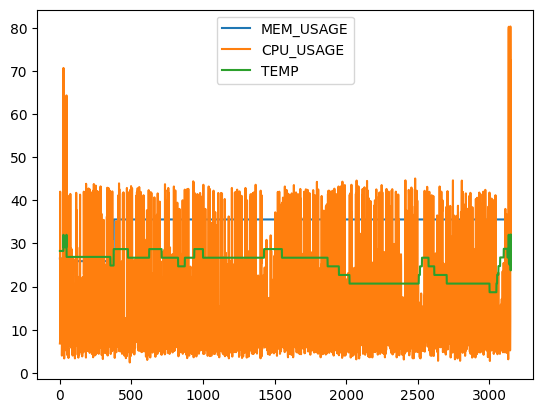

In [7]:
dataset.plot()
plt.show()

XGBOOST

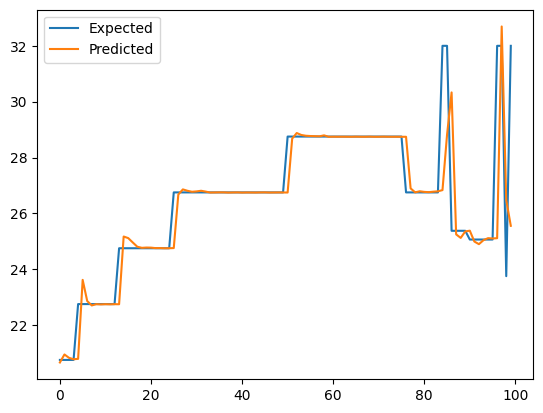

MSE: 1.796911
RMSE: 1.340489
MAE: 0.448495
MAPE: 0.015917%
SMAPE:0.016448
R-squared:0.703249


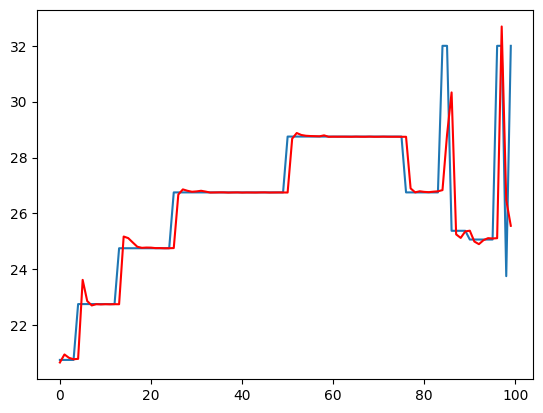

5.6332480907440186


In [198]:
import time
start = time.time()
#%%timeit
#result = %time 
#import timeit
#%timeit
#a = (timeit.timeit())
#print(a)

from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
from sklearn.metrics import r2_score

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[0]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit xgboost and make a one step prediction
def xgboost_forecast(train, testX):
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	#model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4, eta=0.1, 
	min_child_weight=1,subsample=0.9, colsample_bytree=0.9)
	model.fit(trainX, trainy)
    #multi-step prediction
	#trained_model = MultiOutputRegressor(model).fit(trainX, trainy)
    #train_forecasts = trained_model.predict(x_train)
	#print(testX)
	yhat = model.predict(asarray([testX]))
	#print(yhat)
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions


# transform the time series data into supervised learning
data = series_to_supervised(dataset['TEMP'], n_in=8)
#print(data.shape)
yhat = np.array(yhat)
# evaluate
mae, y, yhat = walk_forward_validation(data, 100)
#print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

mse = mean_squared_error(y, yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, yhat)
mape = np.mean(np.abs((y - yhat) / y) * 1)
print('MSE: {:.6f}'.format(mse))
print('RMSE: {:.6f}'.format(rmse))
print('MAE: {:.6f}'.format(mae))
print('MAPE: {:.6f}%'.format(mape))
def smape(actual, forecast):
    """Symmetric mean absolute percentage error"""
    return np.mean((np.abs(actual - forecast) * 2 / (np.abs(actual) + np.abs(forecast))))
smape_score = smape(y, yhat)
print("SMAPE:{:.6f}" .format(smape_score))
# Calculate R-squared score
r2 = r2_score(y,yhat)
print("R-squared:{:.6f}" .format(r2))
#plot forecasts against actual outcomes
pyplot.plot(y)
pyplot.plot(yhat, color='red')
pyplot.show()
#print(result)
#%time 
#print(timeit.timeit() - a)
end = time.time()
print(end - start)

(3145, 6)
MAE: 0.742


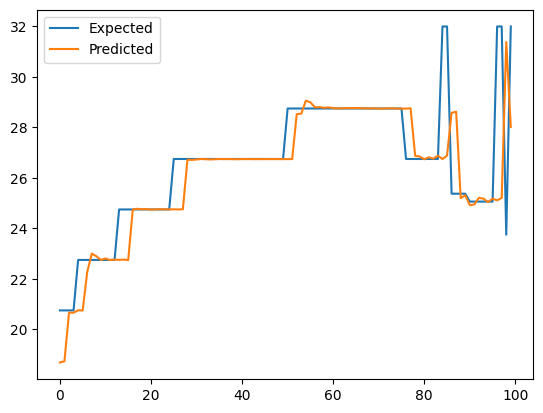

MSE: 2.992858
RMSE: 1.729988
MAE: 0.742301
MAPE: 0.027374%
SMAPE:0.028026
R-squared:0.505744


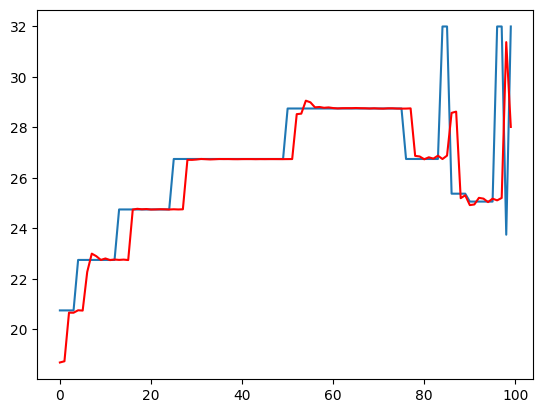

5.150763034820557


In [222]:
import time
start = time.time()

from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
# 	n_vars = 1 if type(data) is list else data.shape[0]
# 	df = DataFrame(data)
# 	cols = list(), list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 		# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 	# put it all together
# 	agg = concat(cols, axis=1)
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg.values
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[0]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values


# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-2], train[:, -2:]
	# fit model
	#model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	#print(train.shape)
	#print(trainX.shape)
	#print(trainy.shape)
    # fitting
	#model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)).fit(trainX, trainy)
	model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4, eta=0.1, 
	min_child_weight=1,subsample=0.9, colsample_bytree=0.9)).fit(trainX, trainy)
    # predicting

    #print(np.mean((multioutputregressor.predict(X) - y)**2, axis=0))
	#model.fit(trainX, trainy)
	# make a one-step prediction
	#print(testX)
	#model = MultiOutputRegressor(model).fit(trainX, trainy)
	yhat = model.predict(asarray([testX]))
	#print("yhat is :",yhat)
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	#print("history is ", history)
	# step over each time-step in the test set
	for i in range(0,len(test),2):
		# split test row into input and output columns
		testX, testy = test[i, :-2], test[i, -2:]
		#print("testX shape is:", testX.shape)
		#print("testy shape is :", testy.shape)
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
		#print('>expected = ',testy)
		#print('>predicted = ',yhat)       
	# estimate prediction error
	#print('>expected = ',testy)
	predictions2 = [num for sublist in predictions for num in sublist]
	#print(len(predictions2))
	#print(test[:, -2:])
	error = mean_absolute_error(test[:, -1], predictions2)
	return error, test[:, -1], predictions2


# transform the time series data into supervised learning
data = series_to_supervised(dataset['TEMP'],4,2)
print(data.shape)
# evaluate
mae, y, yhat = walk_forward_validation(data, 100)
#print(y)
#print(yhat)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

mse = mean_squared_error(y, yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, yhat)
mape = np.mean(np.abs((y - yhat) / y) * 1)
print('MSE: {:.6f}'.format(mse))
print('RMSE: {:.6f}'.format(rmse))
print('MAE: {:.6f}'.format(mae))
print('MAPE: {:.6f}%'.format(mape))
def smape(actual, forecast):
    """Symmetric mean absolute percentage error"""
    return np.mean((np.abs(actual - forecast) * 2 / (np.abs(actual) + np.abs(forecast))))
smape_score = smape(y, yhat)
print("SMAPE:{:.6f}" .format(smape_score))
# Calculate R-squared score
r2 = r2_score(y,yhat)
print("R-squared:{:.6f}" .format(r2))
#plot forecasts against actual outcomes
pyplot.plot(y)
pyplot.plot(yhat, color='red')
pyplot.show()

end = time.time()
print(end - start)

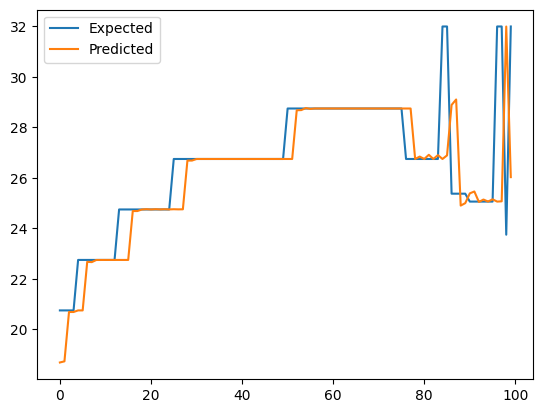

In [10]:
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

MULTI_STEP FORECASTING

(3071, 80)
MAE: 3.207


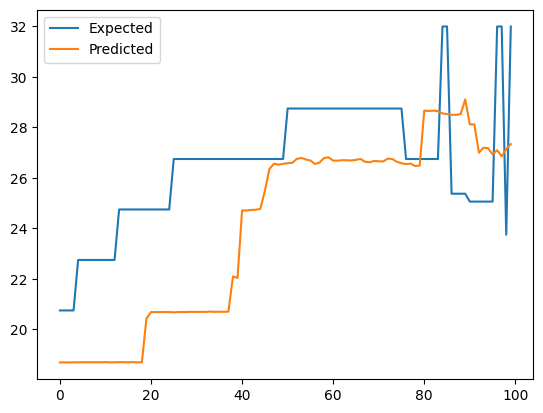

MSE: 13.406029
RMSE: 3.661425
MAE: 3.206860
MAPE: 0.123073%
SMAPE:0.132476
R-squared:-1.213940


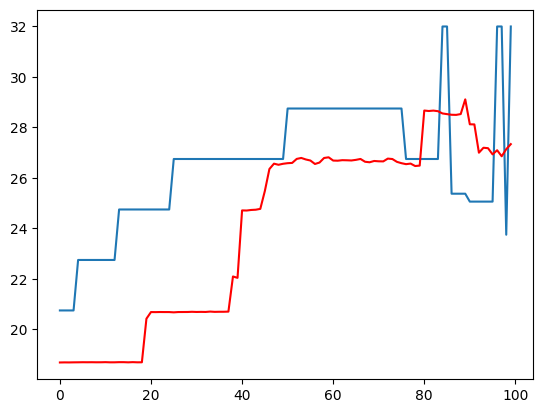

8.982070922851562


In [238]:
import time
start = time.time()

from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[0]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values


# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-20], train[:, -20:]
	# fit model
	#model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	#print(train.shape)
	#print(trainX.shape)
	#print(trainy.shape)
    # fitting
	#model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)).fit(trainX, trainy)
	model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4, eta=0.1, 
	min_child_weight=1,subsample=0.9, colsample_bytree=0.9)).fit(trainX, trainy)
    # predicting

    #print(np.mean((multioutputregressor.predict(X) - y)**2, axis=0))
	#model.fit(trainX, trainy)
	# make a one-step prediction
	#print(testX)
	#model = MultiOutputRegressor(model).fit(trainX, trainy)
	yhat = model.predict(asarray([testX]))
	#print("yhat is :",yhat)
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	#print(test)
	#print("train shape is :",train.shape)
	#print("test shape is :",test.shape)
	# seed history with training dataset
	history = [x for x in train]
	#print("history is ", history)
	# step over each time-step in the test set
	for i in range(0,len(test),20):
		# split test row into input and output columns
		testX, testy = test[i, :-20], test[i, -20:]
		#print("testX shape is:", testX.shape)
		#print("testy shape is :", testy.shape)
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		#print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
		#print('>expected = ',testy)
		#print('>predicted = ',yhat)       
	# estimate prediction error
	#print('>expected = ',testy)
	predictions2 = [num for sublist in predictions for num in sublist]
	#print(len(predictions2))
	#print(test[:, -2:])
	error = mean_absolute_error(test[:, -1], predictions2)
	return error, test[:, -1], predictions2


# transform the time series data into supervised learning
data = series_to_supervised(dataset['TEMP'],60,20)
print(data.shape)
# evaluate
mae, y, yhat = walk_forward_validation(data, 100)
#print(y)
#print(yhat)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

mse = mean_squared_error(y, yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, yhat)
mape = np.mean(np.abs((y - yhat) / y) * 1)
print('MSE: {:.6f}'.format(mse))
print('RMSE: {:.6f}'.format(rmse))
print('MAE: {:.6f}'.format(mae))
print('MAPE: {:.6f}%'.format(mape))
def smape(actual, forecast):
    """Symmetric mean absolute percentage error"""
    return np.mean((np.abs(actual - forecast) * 2 / (np.abs(actual) + np.abs(forecast))))
smape_score = smape(y, yhat)
print("SMAPE:{:.6f}" .format(smape_score))
# Calculate R-squared score
r2 = r2_score(y,yhat)
print("R-squared:{:.6f}" .format(r2))
#plot forecasts against actual outcomes
pyplot.plot(y)
pyplot.plot(yhat, color='red')
pyplot.show()

end = time.time()
print(end - start)

LSTM

CPU times: total: 0 ns
Wall time: 0 ns
0.007214999990537763
(3142, 9)
[26.75  26.75  32.    32.    25.375 25.375 25.375 25.375]
(3132, 1)
(3132, 8)
Epoch 1/10
196/196 [==============================] - 4s 15ms/step - loss: 49.4709
Epoch 2/10
196/196 [==============================] - 3s 14ms/step - loss: 10.0074
Epoch 3/10
196/196 [==============================] - 3s 15ms/step - loss: 8.3535
Epoch 4/10
196/196 [==============================] - 3s 15ms/step - loss: 7.5498
Epoch 5/10
196/196 [==============================] - 3s 15ms/step - loss: 7.7269
Epoch 6/10
196/196 [==============================] - 3s 15ms/step - loss: 7.2772
Epoch 7/10
196/196 [==============================] - 3s 14ms/step - loss: 7.0514
Epoch 8/10
196/196 [==============================] - 3s 14ms/step - loss: 6.8234
Epoch 9/10
196/196 [==============================] - 3s 14ms/step - loss: 7.3210
Epoch 10/10
196/196 [==============================] - 3s 14ms/step - loss: 7.0063
>expected=25.1, predicted=25.

>expected=25.1, predicted=25.6
[25.375      25.375      25.375      25.375      25.06200027 25.06200027
 25.06200027 25.06200027]
(3136, 1)
(3136, 8)
Epoch 1/10
196/196 [==============================] - 2s 8ms/step - loss: 64.4750
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 9.1397
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 8.3232
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 7.8808
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 8.0133
Epoch 6/10
196/196 [==============================] - 1s 7ms/step - loss: 7.7437
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 7.1293
Epoch 8/10
196/196 [==============================] - 1s 7ms/step - loss: 7.1566
Epoch 9/10
196/196 [==============================] - 1s 7ms/step - loss: 7.1749
Epoch 10/10
196/196 [==============================] - 1s 7ms/step - loss: 6.8425
>expected=25.1, predicted=24.0
[25.375

>expected=32.0, predicted=27.0
[25.06200027 25.06200027 25.06200027 25.06200027 25.06200027 25.06200027
 32.         32.        ]
(3140, 1)
(3140, 8)
Epoch 1/10
197/197 [==============================] - 4s 15ms/step - loss: 44.0963
Epoch 2/10
197/197 [==============================] - 3s 14ms/step - loss: 8.6738
Epoch 3/10
197/197 [==============================] - 3s 14ms/step - loss: 8.3298
Epoch 4/10
197/197 [==============================] - 3s 14ms/step - loss: 7.4767
Epoch 5/10
197/197 [==============================] - 3s 14ms/step - loss: 7.5791
Epoch 6/10
197/197 [==============================] - 3s 14ms/step - loss: 7.6158
Epoch 7/10
197/197 [==============================] - 3s 14ms/step - loss: 7.5921
Epoch 8/10
197/197 [==============================] - 3s 14ms/step - loss: 7.1619
Epoch 9/10
197/197 [==============================] - 3s 14ms/step - loss: 7.0489
Epoch 10/10
197/197 [==============================] - 3s 14ms/step - loss: 7.1876
>expected=23.8, predicted=27

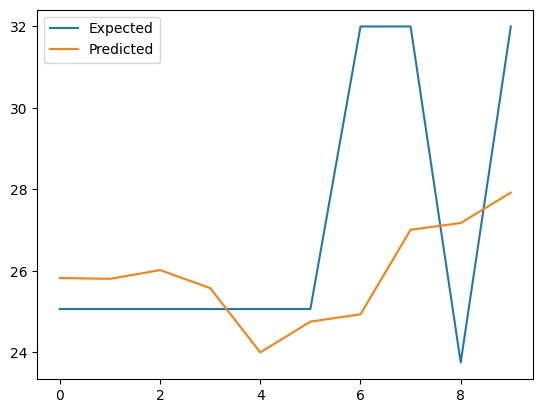

MSE: 10.676758
RMSE: 3.267531
MAE: 2.391116
MAPE: 9.352086%
SMAPE:9.851091
R-squared:0.012290


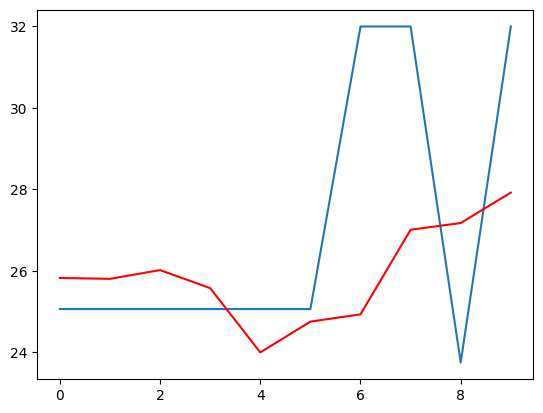

CPU times: total: 0 ns
Wall time: 0 ns


In [243]:
%time 
import timeit
%timeit
print(timeit.timeit())

# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# Importing necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[0]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def lstm_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    trainy.shape = (trainy.shape[0], 1)
    print(testX)
    print(trainy.shape)
    print(trainX.shape)
       # Reshaping the input data to fit the LSTM network
    trainX = trainX.reshape((trainX.shape[0], trainX.shape[1],1))
    trainy = trainy.reshape((trainy.shape[0], trainy.shape[1], 1))

        # Creating the LSTM model
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(2, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    # Build the LSTM model
    #model = Sequential()
    #model.add(LSTM(128, activation='relu', input_shape=(2, 1)))
    #model.add(Dropout(0.2))
    #model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse')

        # Training the model
    model.fit(trainX, trainy, epochs=10, batch_size=16, verbose=1 )


    #model.fit(trainX, trainy)
        #multi-step prediction
    #rained_model = MultiOutputRegressor(model).fit(trainX, trainy)
        #train_forecasts = trained_model.predict(x_train)
    # make a one-step prediction
    #print(testX)
    testX=np.asarray(testX)
    testX.shape = (testX.shape[0], 1)
    
    yhat = model.predict(asarray([testX]))
    #print(yhat)
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = lstm_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


# transform the time series data into supervised learning
data = series_to_supervised(dataset['TEMP'], n_in=8)
print(data.shape)
# evaluate
mae, y, yhat = walk_forward_validation(data, 10)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()


mse = mean_squared_error(y, yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, yhat)
mape = np.mean(np.abs((y - yhat) / y) * 100)
print('MSE: {:.6f}'.format(mse))
print('RMSE: {:.6f}'.format(rmse))
print('MAE: {:.6f}'.format(mae))
print('MAPE: {:.6f}%'.format(mape))
def smape(actual, forecast):
    """Symmetric mean absolute percentage error"""
    return np.mean((np.abs(actual - forecast) * 200 / (np.abs(actual) + np.abs(forecast))))
smape_score = smape(y, yhat)
print("SMAPE:{:.6f}" .format(smape_score))
# Calculate R-squared score
r2 = r2_score(y,yhat)
print("R-squared:{:.6f}" .format(r2))
#plot forecasts against actual outcomes
pyplot.plot(y)
pyplot.plot(yhat, color='red')
pyplot.show()
%time 

(3129, 22)
(3089, 20)
(3089, 2)
Epoch 1/10
258/258 [==============================] - 4s 11ms/step - loss: 114.2543
Epoch 2/10
258/258 [==============================] - 3s 11ms/step - loss: 13.4493
Epoch 3/10
258/258 [==============================] - 3s 11ms/step - loss: 9.4780
Epoch 4/10
258/258 [==============================] - 3s 11ms/step - loss: 8.1021
Epoch 5/10
258/258 [==============================] - 3s 11ms/step - loss: 7.3896
Epoch 6/10
258/258 [==============================] - 3s 11ms/step - loss: 6.5798
Epoch 7/10
258/258 [==============================] - 3s 11ms/step - loss: 6.1634
Epoch 8/10
258/258 [==============================] - 3s 11ms/step - loss: 6.0640
Epoch 9/10
258/258 [==============================] - 3s 11ms/step - loss: 5.5954
Epoch 10/10
258/258 [==============================] - 3s 11ms/step - loss: 5.5781
>expected =  [26.75 26.75 26.75 26.75 26.75 26.75 26.75 26.75 26.75 28.75 28.75 28.75
 28.75 28.75 28.75 28.75 28.75 28.75 28.75 28.75]
>predict

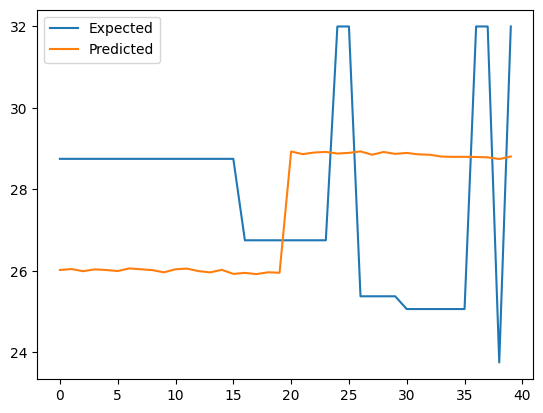

In [60]:
%time 
import timeit
%timeit
print(timeit.timeit())

# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# Importing necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[0]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def lstm_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-20], train[:, -20:]
    # fit model
    #trainy.shape = (trainy.shape[0], 1)
    #print(testX)
    print(trainy.shape)
    print(trainX.shape)
       # Reshaping the input data to fit the LSTM network
    trainX = trainX.reshape((trainX.shape[0], trainX.shape[1],1))
    trainy = trainy.reshape((trainy.shape[0], trainy.shape[1], 1))

        # Creating the LSTM model
    #model = Sequential()
    #model.add(LSTM(64, activation='relu', input_shape=(2, 1)))
    #model.add(Dropout(0.2))
    #model.add(Dense(20))
    

    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(2, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(20))
    
    model.compile(optimizer='adam', loss='mse')

        # Training the model
    model.fit(trainX, trainy, epochs=10, batch_size=12, verbose=1 )

2
    #print(testX)
    testX=np.asarray(testX)
    testX.shape = (testX.shape[0], 1)
    
    yhat = model.predict(asarray([testX]))
    #print(yhat)
    return yhat[0]

# walk-forward validation for univariate data   
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(0, len(test), 20):
        # split test row into input and output columns
        testX, testy = test[i, :-20], test[i, -20:]
        # fit model on history and make a prediction
        yhat = lstm_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        #print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
        print('>expected = ',testy)
        print('>predicted = ',yhat)
    # estimate prediction error
    predictions2 = [num for sublist in predictions for num in sublist]
    print(len(predictions2))
    print(test[:, -2:])
    error = mean_absolute_error(test[:, -1], predictions2)
    return error, test[:, -1], predictions2

    #error = mean_absolute_error(test[:, -1], predictions)
    #return error, test[:, -1], predictions

# transform the time series data into supervised learning
data = series_to_supervised(dataset['TEMP'], 2,20)
print(data.shape)
# evaluate
mae, y, yhat = walk_forward_validation(data, 40)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

end = time.time()
print(end - start)

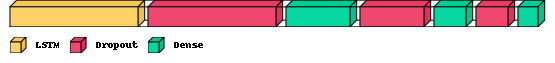

In [74]:
import visualkeras
#model = Sequential()
#model.add(LSTM(64, activation='relu', input_shape=(2, 1)))
#model.add(Dropout(0.2))
#model.add(Dense(20))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(2, 1)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))


#visualkeras.graph_view(model,end=).show()
visualkeras.layered_view(model, legend=True,scale_xy=1, scale_z=1, max_z=1000)

ARIMA

C:\Users\aggelosuser\AppData\Local\Temp\ipykernel_36432\571919582.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Test RMSE: 16.544


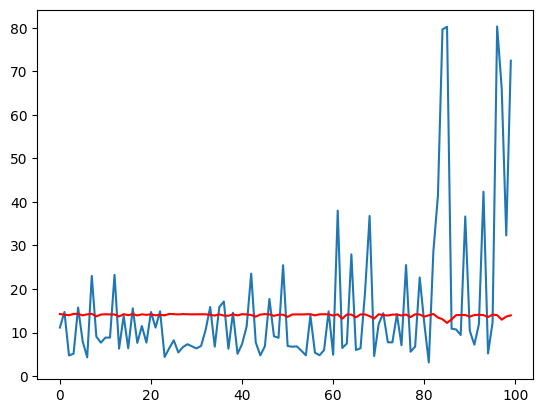

MSE: 273.711216
RMSE: 16.544220
MAE: 9.899139
MAPE: 0.809176%
SMAPE:0.596940
R-squared:-0.025250


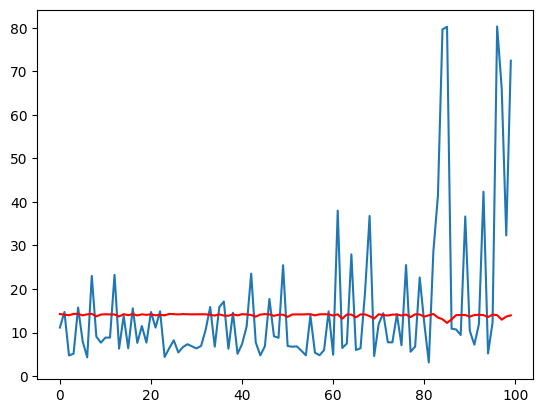

18.265939712524414


In [256]:
import time
start = time.time()

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = dataset['CPU_USAGE']

# split into train and test sets
X = series.values
size = 100 # int(len(X) * 0.66)
train, test = X[:-size], X[-size:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

mse = mean_squared_error(test[:len(predictions)], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test[:len(predictions)], predictions)
mape = np.mean(np.abs((test[:len(predictions)] - predictions) / test[:len(predictions)])) * 1
print('MSE: {:.6f}'.format(mse))
print('RMSE: {:.6f}'.format(rmse))
print('MAE: {:.6f}'.format(mae))
print('MAPE: {:.6f}%'.format(mape))
def smape(actual, forecast):
    """Symmetric mean absolute percentage error"""
    return np.mean((np.abs(actual - forecast) * 2 / (np.abs(actual) + np.abs(forecast))))
smape_score = smape(test[:len(predictions)], predictions)
print("SMAPE:{:.6f}" .format(smape_score))
# Calculate R-squared score
r2 = r2_score(test[:len(predictions)],predictions)
print("R-squared:{:.6f}" .format(r2))
#plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

end = time.time()
print(end - start)

C:\Users\aggelosuser\AppData\Local\Temp\ipykernel_36432\90526236.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


MSE: 273.466530
RMSE: 16.536823
MAE: 9.897984
MAPE: 0.809033%
SMAPE:0.596938
R-squared:-0.024334


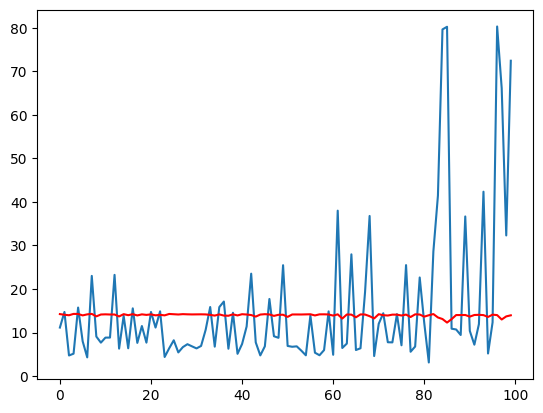

57.489888429641724


In [254]:
import time
start = time.time()

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

# load dataset
series = dataset['CPU_USAGE']

# split into train and test sets
X = series.values
#size = int(len(X) * 0.66)
size = 100 # int(len(X) * 0.66)
train, test = X[:-size], X[-size:]
#train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
horizon = 1  # set the forecasting horizon to 5

# iterate over the test set and predict 5 steps at a time
for t in range(0, len(test), horizon):
    if t+horizon > len(test):
        break  # if less than 5 samples left in the test set, break out of the loop
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=horizon)
    #print(output)
    #yhat = output[0]
    predictions.extend(output.tolist())
    history.extend(test[t:t+horizon])
    # print('predicted=%s, expected=%s' % (yhat, test[t:t+horizon]))

# evaluate forecasts
#rmse = sqrt(mean_squared_error(test[:len(predictions)], predictions))
#print('Test RMSE: %.3f' % rmse)
# Step 5: Evaluate the performance of the ARIMA model
mse = mean_squared_error(test[:len(predictions)], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test[:len(predictions)], predictions)
mape = np.mean(np.abs((test[:len(predictions)] - predictions) / test[:len(predictions)])) * 1
print('MSE: {:.6f}'.format(mse))
print('RMSE: {:.6f}'.format(rmse))
print('MAE: {:.6f}'.format(mae))
print('MAPE: {:.6f}%'.format(mape))
def smape(actual, forecast):
    """Symmetric mean absolute percentage error"""
    return np.mean((np.abs(actual - forecast) * 2 / (np.abs(actual) + np.abs(forecast))))
smape_score = smape(test[:len(predictions)], predictions)
print("SMAPE:{:.6f}" .format(smape_score))
# Calculate R-squared score
r2 = r2_score(test[:len(predictions)],predictions)
print("R-squared:{:.6f}" .format(r2))
#plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

end = time.time()
print(end - start)